In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Events_HolidaysData.xlsx', 'MacroEconomicData.xlsx', 'WeatherData.xlsx', 'Sample_Submission.csv', 'AttributesDescription.xlsx', 'Train_Kaggle.csv', 'Test_Kaggle.csv']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

training=pd.read_csv("../input/Train_Kaggle.csv")
testing=pd.read_csv("../input/Test_Kaggle.csv")
holidays=pd.read_excel('../input/Events_HolidaysData.xlsx')
weather= pd.read_excel('../input/WeatherData.xlsx')
data_w1 = pd.read_excel('../input/WeatherData.xlsx', sheet_name='2009', ignore_index=True)
data_w2 = pd.read_excel('../input/WeatherData.xlsx', sheet_name='2010', ignore_index=True)
data_w3 = pd.read_excel('../input/WeatherData.xlsx', sheet_name='2011', ignore_index=True)
data_w4 = pd.read_excel('../input/WeatherData.xlsx', sheet_name='2012', ignore_index=True)
data_w5 = pd.read_excel('../input/WeatherData.xlsx', sheet_name='2013', index_col=None)
data_w6 = pd.read_excel('../input/WeatherData.xlsx', sheet_name='2014', index_col=None)
data_w7 = pd.read_excel('../input/WeatherData.xlsx', sheet_name='2015', index_col=None)
data_w8 = pd.read_excel('../input/WeatherData.xlsx', sheet_name='2016', index_col=None)
med=pd.read_excel('../input/MacroEconomicData.xlsx')

In [ ]:
med['Year-Month'] = pd.to_datetime(med['Year-Month'])
med['Year']=pd.DatetimeIndex(med['Year-Month']).year
med['Month']=pd.DatetimeIndex(med['Year-Month']).month
med = med.drop(['Year-Month'],axis=1)

In [ ]:
med=med.rename(columns = {"AdvertisingExpenses (in Thousand Dollars)": "advertising"})
med['advertising'] = med['advertising'].astype(str)
med['advertising']= med.advertising.replace({'?':'116'})
med['advertising'] = med['advertising'].astype(int)
med['Year'] = med['Year'].astype(str)
med['Month'] = med['Month'].astype(str)

med

In [ ]:
data_w1['Year'] = data_w1['Year'].astype('str') 
data_w2.Year='2010'
data_w3.Year='2011'
data_w4.Year='2012'
data_w5.Year='2013'
data_w6.Year='2014'
data_w7.Year='2015'
data_w8.Year='2016'
cdf=data_w1
cdf = cdf.append(data_w2)
cdf = cdf.append(data_w3)
cdf = cdf.append(data_w4)
cdf = cdf.append(data_w5)
cdf = cdf.append(data_w6)
cdf = cdf.append(data_w7)
cdf = cdf.append(data_w8)

dw2=cdf.groupby(['Year','Month'], as_index=False).agg(lambda x : x.mean() if x.dtype=='int64' else x.head(1))
dw2['Year'] = dw2['Year'].str.strip()
#med['Year'] = med['Year'].str.strip()
dw2['Month'] = dw2['Month'].str.strip()
#med['Month'] = med['Month'].str.strip()
data1=pd.DataFrame()
data1=pd.merge(med,dw2, on=['Year','Month'])
data1['Month'] = data1['Month'].apply(lambda x:  strptime(x, '%b').tm_mon)
data1=data1.drop(data1[data1['Year']>'2014'].index)


In [ ]:
training = training.rename(columns = {"Sales(In ThousandDollars)": "Sales"}) 

trainW = training.loc[training['ProductCategory'] == 'WomenClothing']
trainM = training.loc[training['ProductCategory'] == 'MenClothing']
trainO = training.loc[training['ProductCategory'] == 'OtherClothing']

trainW.fillna(trainW.Sales.min(),inplace=True)
trainM.fillna(trainM.Sales.min(),inplace=True)
trainO.fillna(trainO.Sales.min(),inplace=True)

frames = [trainW, trainM, trainO]
result = pd.concat(frames)

result['Year'] = result['Year'].astype(str)

data2=pd.merge(data1,result, on=['Year','Month'])
#data2=data2.fillna(0)
#data3=data2.replace('?', '0', regex=False)
#data2=data2.replace('T', '0', regex=False)
data2

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,advertising,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Year,Month,ProductCategory,Sales


In [ ]:

weather=weather.fillna(0)
weather_new=pd.DataFrame()
weather_new[['Year','Month','Day','W_event']]=weather[['Year','Month','Day','WeatherEvent']]
weather_new

,Year,Month,Day,W_event
0,2009,Jan,1,0
1,2009,Jan,2,Snow
2,2009,Jan,3,0
3,2009,Jan,4,0
4,2009,Jan,5,0
5,2009,Jan,6,Rain
6,2009,Jan,7,Rain
7,2009,Jan,8,0
8,2009,Jan,9,0
9,2009,Jan,10,"Fog , Rain , Snow"


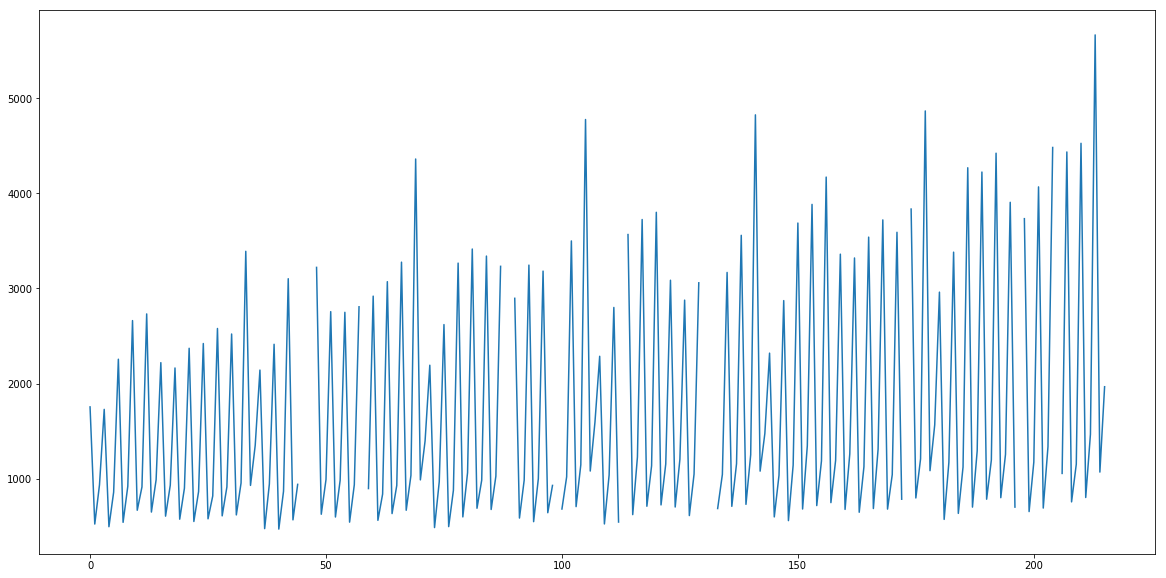

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(training.Sales.values)

In [ ]:

holidays['Month'] = pd.DatetimeIndex(holidays['MonthDate']).month
holidays['MonthDate'] = pd.to_datetime(holidays['MonthDate'])
holidays['Year_new']=pd.DatetimeIndex(holidays['MonthDate']).year
holidays['Year_new'] = holidays['Year_new'].astype(str)
holidays['Day'] = holidays['Year_new'].str[2:]
holiday_new=pd.DataFrame(holidays.drop(['MonthDate','Year_new'],axis=1))
#holiday_new=holiday_new[:18]



In [ ]:


from sklearn.ensemble.forest import RandomForestRegressor 
import numpy as np
RF_Model = RandomForestRegressor(n_estimators=100,
                                 max_features=1, oob_score=True)
 
# let's get the labels and features in order to run our 
# model fitting
y_train=data31.iloc[:,:-1]
X_train=data31.iloc[:,:-1]
X_test=data31.iloc[:,:-1]


labels = y_train
features = X_train

# Fit the RF model with features and labels.
rgr=RF_Model.fit(features, labels)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    rgr.predict(X_test)).rename(
    columns={0:'predicted_price'}).set_index('predicted_price')
X_train_predict=pd.DataFrame(
    rgr.predict(X_train)).rename(
    columns={0:'predicted_price'}).set_index('predicted_price')
 
# combine the training and testing dataframes to visualize
# and compare.
RF_predict = X_train_predict.append(X_test_predict)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, X_test)


NameError: name 'data31' is not defined